# Quickstart

We begin with a straightforward example: PCA (EOF analysis) of a 3D `xarray.Dataset`.

## Import the package
We start by importing the ``xarray`` and ``xeofs`` package.

In [19]:
import xarray as xr
import xeofs as xe

xr.set_options(display_expand_attrs=False)

## Load the data
Next, we fetch the data from the ``xarray`` tutorial repository. The data is a 3D dataset of 6 hourly surface air temperature over North America between 2013 and 2014. 

In [20]:
t2m = xr.tutorial.open_dataset('air_temperature')
t2m

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes: (5)

## Fit the model

In order to apply PCA to the data, we first have to create an `EOF` object.

In [21]:
model = xe.models.EOF()

We will now fit the model to the data. If you've worked with `sklearn` before, this process will seem familiar. However, there's an important difference: while `sklearn` `fit` method typically assumes 2D input data shaped as (`sample` x `feature`), our scenario is less straightforward. For any model, including PCA, we must specify the sample dimension. With this information, `xeofs` will interpret all other dimensions as feature dimensions.

In climate science, it's common to maximize variance along the time dimension when applying PCA. Yet, this isn't the sole approach. For instance, [Compagnucci & Richmann (2007)](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/joc.1574) discuss alternative applications.

`xeofs` offers flexibility in this aspect. You can designate multiple sample dimensions, provided at least one feature dimension remains. For our purposes, we'll set `time` as our sample dimension and then fit the model to our data.

In [22]:
model.fit(t2m, dim='time')

## Inspect the results

Now that the model has been fitted, we can examine the result. For example, one typically starts by looking at the explained variance (ratio). 

In [23]:
model.explained_variance_ratio()

<xarray.DataArray 'explained_variance_ratio' (mode: 2)>
array([0.79683532, 0.0270206 ])
Coordinates:
  * mode     (mode) int64 1 2
Attributes: (13)

We can next examine the spatial patterns, which are the eigenvectors of the covariance matrix, often referred to as EOFs or principal components.

> **_NOTE:_** The `xeofs` library aims to adhere to the convention where the primary patterns obtained from dimensionality reduction (which typically exclude the sample dimension) are termed components (akin to principal components). When data is projected onto these patterns, for instance using the `transform` method, the outcome is termed `scores` (similar to principal component scores). However, this terminology is more of a guideline than a strict rule.

In [24]:
components = model.components()
components

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, mode: 2)
Coordinates:
  * lat      (lat) float32 15.0 17.5 20.0 22.5 25.0 ... 65.0 67.5 70.0 72.5 75.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * mode     (mode) int64 1 2
Data variables:
    air      (mode, lat, lon) float64 0.0022 0.002131 ... 0.02168 0.0221

You'll observe that the result is an `xr.Dataset`, mirroring the format of our original input data. To visualize the components, we can use typical methods for `xarray` objects. Now, let's inspect the first component.

> **_NOTE:_**  `xeofs` is designed to match the data type of its input. For instance, if you provide an `xr.DataArray` as input, the components will also be of type `xr.DataArray`. Similarly, if the input is an `xr.Dataset`, the components will mirror that as an `xr.Dataset`. The same principle applies if the input is a `list`; the output components will be presented in a `list` format. This consistent behavior is maintained across all `xeofs` methods.

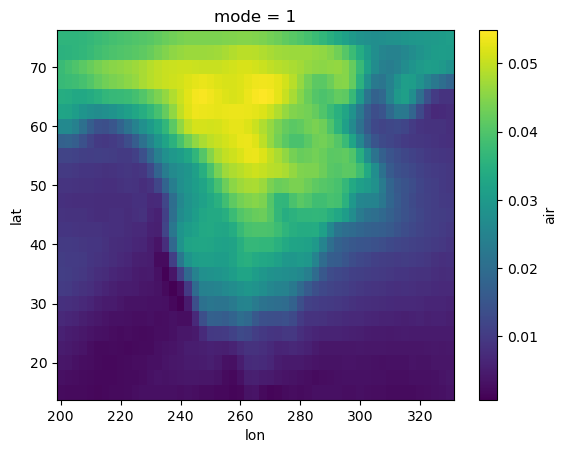

In [25]:
components["air"].sel(mode=1).plot()

We can also examine the principal component scores, which represent the corresponding time series.

> **_NOTE:_**  When comparing the scores from `xeofs` to outputs from other PCA implementations like `sklearn` or `eofs`, you might spot discrepancies in the absolute values. This arises because `xeofs` typically returns scores normalized by the L2 norm. However, if you prefer unnormalized scores, simply set `normalized=False` when using the `scores` or `transform` method."

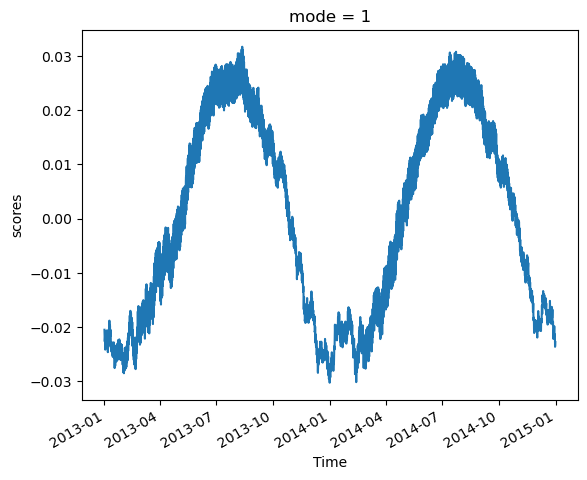

In [26]:
model.scores().sel(mode=1).plot()